This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation and Legendary. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

The data described as :
<ul>
<li>#: ID for each pokemon</li>
<li>Name: Name of each pokemon</li>
<li>Type 1: Each pokemon has a type, this determines weakness/resistance to attacks</li>
<li>Type 2: Some pokemon are dual type and have 2</li>
<li>Total: sum of all stats that come after this, a general guide to how strong a pokemon is</li>
<li>HP: hit points, or health, defines how much damage a pokemon can withstand before fainting</li>
<li>Attack: the base modifier for normal attacks (eg. Scratch, Punch)</li>
<li>Defense: the base damage resistance against normal attacks</li>
<li>SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)</li>
<li>SP Def: the base damage resistance against special attacks</li>
<li>Speed: determines which pokemon attacks first each round</li>
<li>Generation </li>
<li>Legendary</li>
</ul>

Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## For Colab
## Uploading Pokemon.csv files from your local file system

Set the path of datasets

In [ ]:
path = 'data/Pokemon.csv'

Import the path with Pandas.

The argument index_col=0 simply means we'll treat the first column of the dataset as the ID column.

In [ ]:
# Read dataset
df = pd.read_csv(path, index_col=0)

Display the dataset

In [ ]:
# Display first 5 observations
df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation Legendary  
#                                        
1       65     45           1     False  
2       80     60           1     False  
3      100     80           1     False  
3      120     80           1     False  
4       50     65           1     False

<h3>Seaborn's plotting</h3>

Using the lmplot() function.

In this we used to pass our DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.

compare the Attack and Defense stats for our Pokémon:

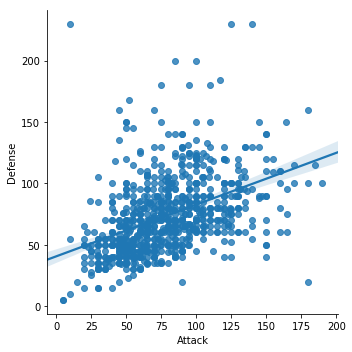

In [ ]:
sns.lmplot(x='Attack', y='Defense', data=df)

we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.

Then, we'll set hue='Generation' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

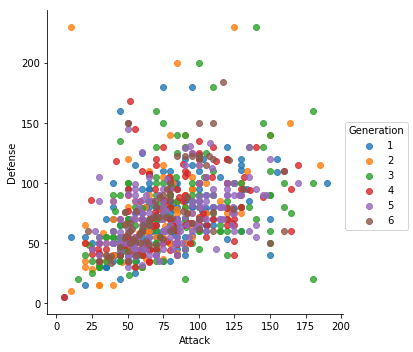

In [ ]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Generation')   # Color by evolution stage

<h3>Customizing with Matplotlib.</h3>

Setting axes limits is one of those times,
<ul>
<li>Invoke Seaborn plotting function as normal.</li>
<li>Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.</li>
</ul>

(0, 201.43563057321734)

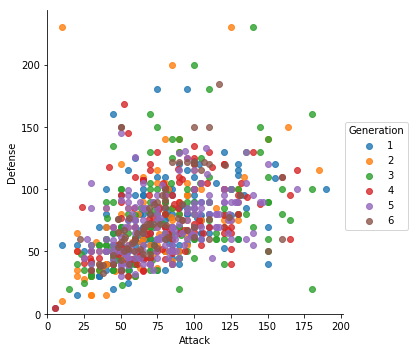

In [ ]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False,
           hue='Generation')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

we wanted to make a box plot for our Pokémon's combat stats:

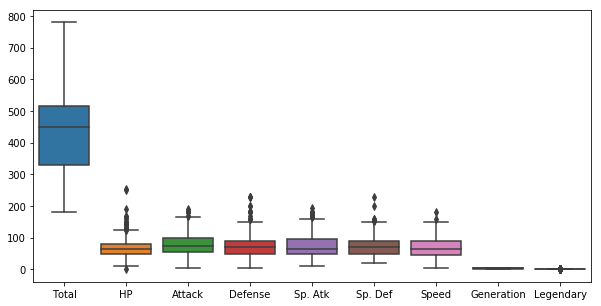

In [ ]:
# Boxplot

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.boxplot(data=df)

There are some columns we'd probably like to remove:
<ul>
<li>We can remove the Total since we have individual stats.</li>
<li>We can remove the Stage and Legendary columns because they aren't combat stats.</li>
</ul>

create a new DataFrame called stats_df that only keeps the stats columns:

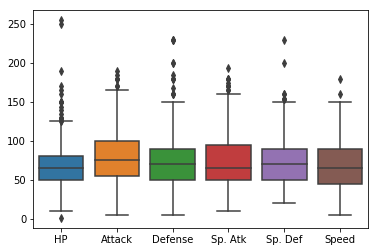

In [ ]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Generation', 'Legendary'], axis=1)

# New boxplot using stats_df
sns.boxplot(data=stats_df)

<h3>Seaborn themes.</h3>

we change the theme to 'whitegrid' while making a violin plot.
<ul>
<li>Violin plots are useful alternatives to box plots.</li>
<li>They show the distribution (through the thickness of the violin) instead of only the summary statistics.</li>
</ul>
we visualize the distribution of Attack by Pokémon's primary type:

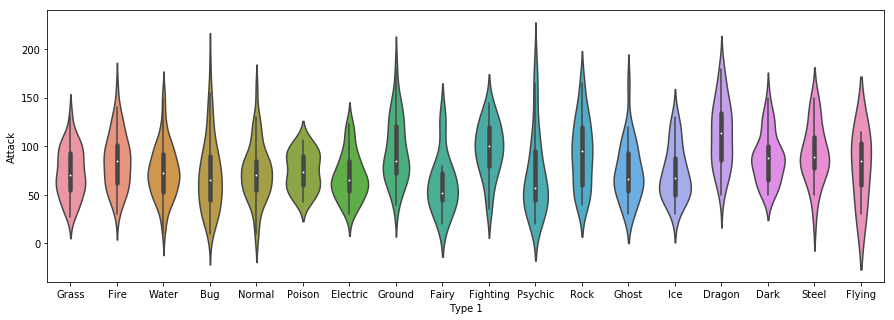

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 5)

# Set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

Lets create <strong>"pkmn_type_colors"</strong> the custom color palettes.

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

we can simply use the palette= argument to recolor our chart.

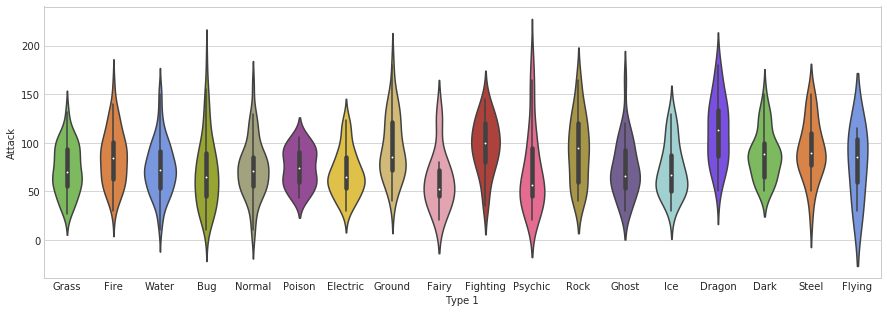

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 5)

# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df,
               palette=pkmn_type_colors) # Set color palette

<strong>swarm plot():</strong> This visualization will show each point, while "stacking" those with similar values:

we have 721 Pokémon in our dataset, we use swarm plot() to simply display each point.

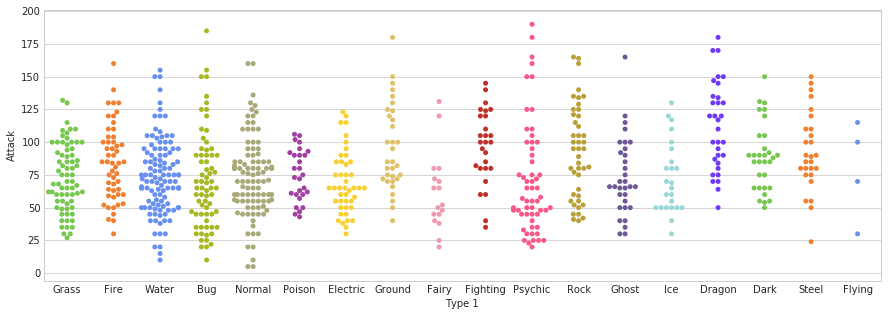

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 5)

# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=pkmn_type_colors)

<h3>Overlaying plots.</h3>

Here we use Matplotlib with seaborn in First point:
<ul>
<li>First, make our figure larger using Matplotlib.</li>
<li>Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.</li>
<li>Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.</li>
<li>Finally, we'll set a title using Matplotlib.</li>
</ul>

In this we showing how Attack values are distributed across different Pokémon types

Text(0.5,1,'Attack by Type')

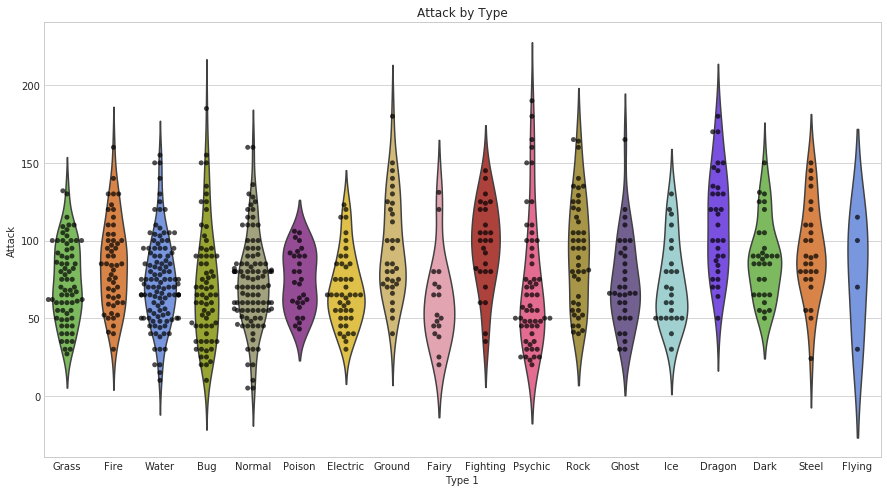

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(15,8))

# Create plot
sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k', # Make points black
              alpha=0.7) # and slightly transparent

# Set title with matplotlib
plt.title('Attack by Type')

<h3>Putting it all together</h3>

Showing First 5 rows of stats_df

In [ ]:
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
#                                                                       
1              Bulbasaur  Grass  Poison  45      49       49       65   
2                Ivysaur  Grass  Poison  60      62       63       80   
3               Venusaur  Grass  Poison  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  
#                  
1       65     45  
2       80     60  
3      100     80  
3      120     80  
4       50     65

we want to "melt" them into one column.

So, we'll use Pandas's melt() function. It takes 3 arguments:
<ul>
<li>First, the DataFrame to melt.</li>
<li>Second, ID variables to keep (Pandas will melt all of the other ones).</li>
<li>Finally, a name for the new, melted variable.</li>
</ul>

In [ ]:
# Melt DataFrame
melted_df = pd.melt(stats_df,
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

Name Type 1  Type 2 Stat  value
0              Bulbasaur  Grass  Poison   HP     45
1                Ivysaur  Grass  Poison   HP     60
2               Venusaur  Grass  Poison   HP     80
3  VenusaurMega Venusaur  Grass  Poison   HP     80
4             Charmander   Fire     NaN   HP     39

print the shape of these two DataFrames

In [ ]:
print( stats_df.shape )
print( melted_df.shape )

(800, 9)
(4800, 5)


you'll find that melted_df has 6 times the number of rows as stats_df.

we're going to set x='Stat' and y='value' so our swarms are separated by stat.
Then, we'll set hue='Type 1' to color our points by the Pokémon type.

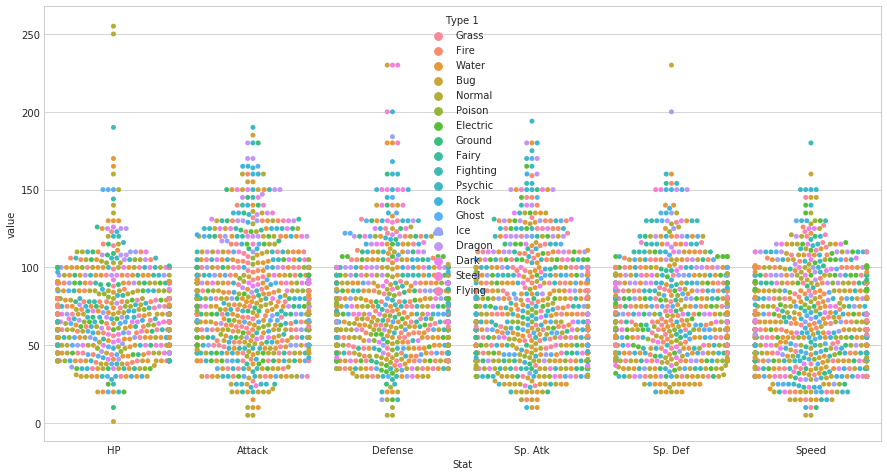

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(15,8))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1')

readable chart:
<ul>
<li>Enlarge the plot.</li>
<li>Separate points by hue using the argument split=True .</li>
<li>Use our custom Pokemon color palette.</li>
<li>Adjust the y-axis limits to end at 0.</li>
<li>Place the legend to the right.</li>
</ul>

/home/datacouch/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


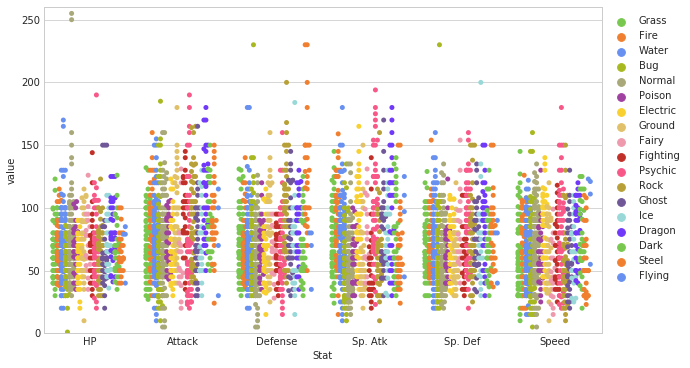

In [ ]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',
              y='value',
              data=melted_df,
              hue='Type 1',
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette

# 4. Adjust the y-axis
plt.ylim(0, 260)

# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<h3>Pokédex (mini-gallery).</h3>

Heatmap

Heatmaps help you visualize matrix-like data.

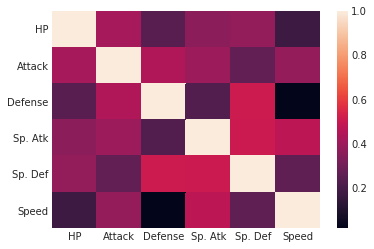

In [ ]:
# Calculate correlations
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

Histogram

Histograms allow you to plot the distributions of numeric variables.

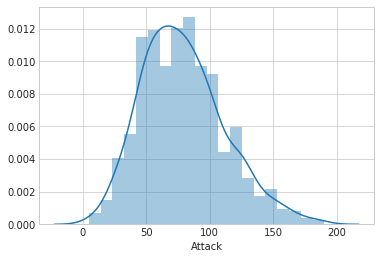

In [ ]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

Bar Plot

Bar plots help you visualize the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

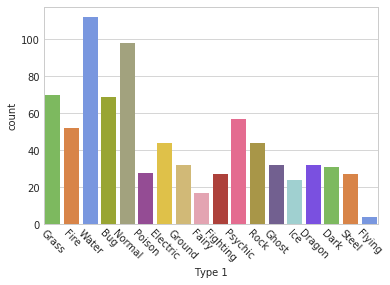

In [ ]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation=-45)

Factor Plot

Factor plots make it easy to separate plots by categorical classes.

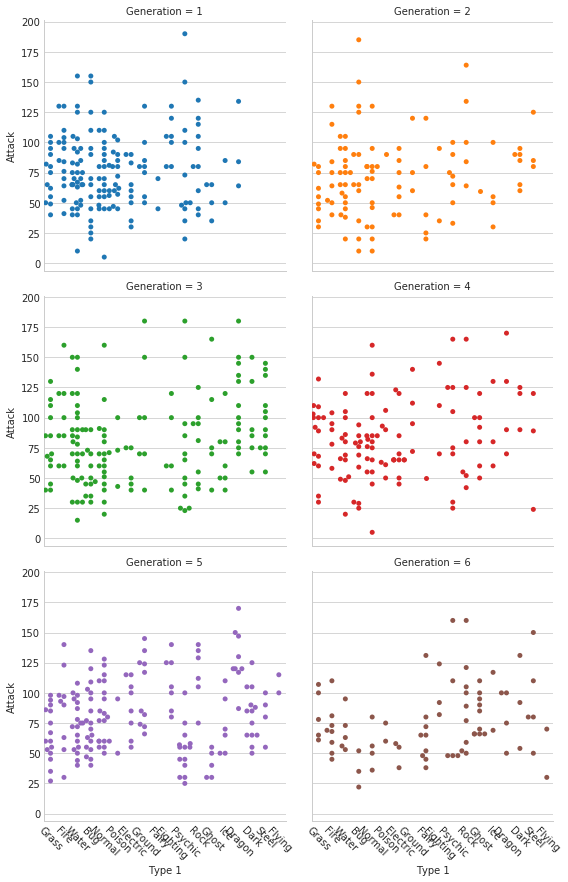

In [ ]:
# Factor Plot
g = sns.factorplot(x='Type 1',
                   y='Attack',
                   data=df,
                   hue='Generation',  # Color by stage
                   col='Generation',  # Separate by stage
                   kind='swarm',      # Swarmplot
                   col_wrap=2)

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

Joint Distribution Plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

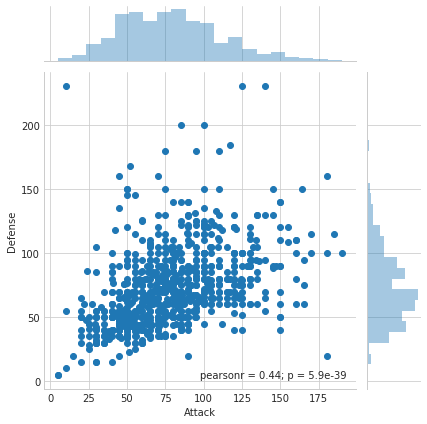

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)